In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import random

In [4]:
# Susenas 2012
sus12_ki = pd.read_csv('/home/ade/Documents/Project_Lab_Pacmann/susenas12/sn12_ki.csv')
sus12_kr = pd.read_csv('/home/ade/Documents/Project_Lab_Pacmann/susenas12/sn12_krt.csv')

# Susenas 2013
sus13_ki = pd.read_csv('~/Documents/Project_Lab_Pacmann/susenas13/sn13_ki.csv')
sus13_kr = pd.read_csv('~/Documents/Project_Lab_Pacmann/susenas13/sn13_krt.csv')

# Susenas Modul Konsumsi
sus13_m41 = pd.read_csv('~/Documents/Project_Lab_Pacmann/susenas13/sn13_m41.csv')
sus12_m41p1 = pd.read_csv('/home/ade/Documents/Project_Lab_Pacmann/susenas12/sn12_m41p1.csv') # part 1 susenas 2012

# Poverty Line Susenas 2013
poverty_line = pd.read_csv("~/Documents/Project_Lab_Pacmann/susenas13/pov_line.csv")
poverty = pd.read_csv("~/Documents/Project_Lab_Pacmann/susenas13/poverty.csv")

Eksplor perilaku kunjungan ke nakes bila ada keluhan kesehatan

- B5R1A

Apakah dalam 1 bulan terakhir mempunyai keluhan kesehatan seperti di bawah ini? (Bacakan dari a s.d. h)
[Isikan kode 1 bila ada, kode 2 bila tidak ada]

- B5R4A
Apakah pernah mengobati sendiri dalam 1 bulan
terakhir? 
1. Ya
2. Tidak  [R.5]

Jenis obat/cara pengobatan yang digunakan:
[Isikan kode 1 bila ya, kode 2 bila tidak]

- B54RB1. Tradisional
- B54RB2. Modern
- B54RB3. Lainnya

In [5]:
print(sus12_ki['B5R1A'].value_counts())
print(sus12_ki['B5R4A'].value_counts())
print(sus12_ki['B5R4B1'].value_counts())
print(sus12_ki['B5R4B2'].value_counts())
print(sus12_ki['B5R4B3'].value_counts())

2    1006353
1     108092
Name: B5R1A, dtype: int64
1.0    211782
2.0    105580
Name: B5R4A, dtype: int64
2.0    154750
1.0     57032
Name: B5R4B1, dtype: int64
1.0    189862
2.0     21920
Name: B5R4B2, dtype: int64
2.0    202857
1.0      8925
Name: B5R4B3, dtype: int64


Kunjungan ke Faskes

Berapa kali berobat jalan selama 1 bulan terakhir:
[Isikan frekuensi berobat jalan untuk setiap fasilitas]

- B5R6A ==	RS pemerintah
- B5R6B	==  RS Swasta
- B5R6C	==  Praktek Dokter/poliklinik
- B5R6D	==  Puskesmas/pustu
- B5R6E	==  Praktek nakes
- B5R6F	==  Praktek batra
- B5R6G	==  Dukun bersalin
- B5R6H	==  Lainnya

In [6]:
# Jumlah berobat ke RS Pemerintah
print(sus12_ki['B5R6A'].value_counts()) 

0.0     131548
1.0       6463
2.0       1992
3.0        516
4.0        291
5.0         69
8.0         48
6.0         41
7.0         39
10.0        24
12.0        13
15.0         5
30.0         5
11.0         4
9.0          2
14.0         2
20.0         2
27.0         1
13.0         1
16.0         1
Name: B5R6A, dtype: int64


In [6]:
# Jumlah berobat ke RS Swasta
print(sus12_ki['B5R6B'].value_counts())

0.0     135672
1.0       3625
2.0       1330
3.0        200
4.0        107
5.0         40
7.0         28
10.0        19
6.0         16
8.0          8
12.0         6
11.0         3
15.0         3
20.0         3
9.0          2
21.0         2
22.0         1
13.0         1
30.0         1
Name: B5R6B, dtype: int64


In [7]:
# Jumlah yang pergi ke praktek dokter/poliklinik
print(sus12_ki['B5R6C'].value_counts())

0.0     105045
1.0      28289
2.0       5420
3.0       1431
4.0        593
5.0        146
6.0         51
7.0         29
10.0        20
8.0         17
11.0         8
12.0         4
20.0         4
14.0         3
30.0         2
15.0         2
18.0         2
9.0          1
Name: B5R6C, dtype: int64


Perilaku Penggunaan Kontrasepsi 
1. sedang menggunakan KB, 
2. Tidak menggunakan KB lagi 
3. Tidak pernah menggunakan KB

In [8]:
print(sus12_ki['B5R35'].value_counts())

1.0    126050
3.0     97762
2.0     93978
Name: B5R35, dtype: int64


In [9]:
sus12_ki['B5R35'].describe()

count    317790.000000
mean          1.910985
std           0.834479
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: B5R35, dtype: float64

In [10]:
# kenapa jumlah NaN lebih tinggi dibanding count ya?
print(sus12_ki['B5R35'].isna().values.sum() / sus12_ki['B5R35'].count())
print(sus12_ki['B5R35'].count() / sus12_ki['B5R35'].isna().values.sum())

2.5068598760187544
0.39890542330117806


Butir metode penggunaan KB:

1. MOW/tubektomi
2. MOP/vasektomi
3. AKDR/IUD/spiral
4. Suntikan KB
5. Susuk KB/norplan/implanon/alwalit
6. Pil KB
7. Kondom/karet KB
8. Intravag/tisue
9. Kondom wanita / menstrual cup(?)
10. Cara tradisional

In [11]:
sus12_ki['B5R36'].count()

126049

In [12]:
sus12_ki['B5R36'].value_counts()

4.0     70870
6.0     29842
5.0      8364
3.0      8258
1.0      4085
10.0     2766
7.0      1014
2.0       709
9.0        96
8.0        45
Name: B5R36, dtype: int64

In [13]:
# Kok yang count lebih rendah dibanding NaN ya?
print(sus12_ki['B5R36'].isna().values.sum()/sus12_ki['B5R36'].count())
print(sus12_ki['B5R36'].count() / sus12_ki['B5R36'].isna().values.sum())

7.841363279359614
0.12752884471406198


Bagi yang tidak menggunakan KB, apa masih ingin mempunyai anak
1. Ya, segera (< 2 tahun)
2. Ya, kemudian ( ≥ 2 tahun)
3. Tidak

In [14]:
sus12_ki['B5R37'].value_counts()

3.0    143670
1.0     33550
2.0     14520
Name: B5R37, dtype: int64

In [15]:
# Kenapa jumlah count lebih rendah dibanding Nan ya?
print(sus12_ki['B5R37'].count() / sus12_ki['B5R37'].isna().values.sum())
print(sus12_ki['B5R37'].isna().values.sum() / sus12_ki['B5R37'].count())

0.20780206024677442
4.812271826431626


Alasan utama tidak ber-KB:
1. Alasan fertilitas (mandul, menopause, puasa
kumpul, tradisi, ingin punya anak) # jujur yang ini ambigu soalnya banyak banget yang dimasukkin
2. Tidak setuju KB
3. Tidak tahu alat/cara KB
4. Takut efek samping alat/cara KB
5. Tidak tahu
6. Lainnya (................................................................)

Lucunya yang terbanyak di sini Alasan fertilitas sama Lainnya, susah dapat insight di sini.

Kalo mandul sih bisa liat umur, entahlah kalo yang lain? Still wanna give this one a go?

In [16]:
print(sus12_ki['B5R38'].describe())
print(sus12_ki['B5R38'].value_counts())

count    158190.000000
mean          2.363095
std           2.014585
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max           6.000000
Name: B5R38, dtype: float64
1.0    103885
6.0     26185
4.0     12320
5.0      9801
2.0      3459
3.0      2540
Name: B5R38, dtype: int64


In [17]:
# baru ini yang perbandingan nya NaN lebih kecil dibanding count
print(sus12_ki['B5R38'].count() / sus12_ki['B5R38'].isna().values.sum())
print(sus12_ki['B5R38'].isna().values.sum() / sus12_ki['B5R38'].count())

0.16542658600477905
6.0449775586320245


Mau liat dulu gimana pembagian perkotaan vs perdesaan

In [18]:
perkotaan_ki12 = len(sus12_ki[sus12_ki['B1R5'] == 1])
print(perkotaan_ki12)

477931


In [19]:
total_ki12 = len(sus12_ki)
proporsi = perkotaan_ki12 / total_ki12
print(proporsi)

0.4288511321779002


In [20]:
perdesaan_ki12 = len(sus12_ki[sus12_ki['B1R5'] == 2])
proporsi2 = perdesaan_ki12 / total_ki12
print(proporsi2)

0.5711488678220998


In [21]:
desakota_ki12 = len(sus12_ki[sus12_ki['B1R5'] == 9])
proporsi3 = desakota_ki12 / total_ki12
print(proporsi3)

0.0


Liat yang dataset rumah tangga juga

In [22]:
perkotaan_kr12 = len(sus12_kr[sus12_kr['B1R5'] == 1])
total_kr12 = len(sus12_kr)

proporsi4 = perkotaan_kr12 / total_kr12
print(proporsi4)

0.4294142524107608


In [23]:
desa_kr12 = len(sus12_kr[sus12_kr['B1R5'] == 2])

proporsi5 = desa_kr12 / total_kr12
print(proporsi5)

0.5705857475892392


Coba groupby pake status kota desa, merasa cukup ato engga pake pengeluaran

In [24]:
sus12_kr.groupby(['B1R5', 'B7R5A']).median()['EXP_CAP']

B1R5  B7R5A
1     1        731357.142857
      2        442644.642857
2     1        467235.119048
      2        344964.523810
Name: EXP_CAP, dtype: float64

Sekarang mau liat pemakaian KB berdasarkan lokasi tinggal desa/kota, ama pengeluaran

In [25]:
sus12_ki.groupby(['B1R5', 'B5R35']).count()['EXP_CAP']

B1R5  B5R35
1     1.0      53855
      2.0      44776
      3.0      36211
2     1.0      72195
      2.0      49202
      3.0      61551
Name: EXP_CAP, dtype: int64

Sekarang berdasarkan pendidikan (ijazah yang dicapai)

In [26]:
sus12_ki.groupby(['B1R5', 'B5R35']).count()['B5R17']

B1R5  B5R35
1     1.0      53174
      2.0      42296
      3.0      31110
2     1.0      69506
      2.0      43102
      3.0      45012
Name: B5R17, dtype: int64

Sekarang ditambah umur

In [27]:
sus12_ki.groupby(['B1R5', 'B5R35', 'UMUR']).count()['EXP_CAP']

B1R5  B5R35  UMUR
1     1.0    13        1
             15        2
             16       19
             17       60
             18      142
                    ... 
2     3.0    94       20
             95       38
             96       22
             97       27
             98      141
Name: EXP_CAP, Length: 484, dtype: int64

Susenas merupakan dataset yang berukuran besar dan memiliki variabel yang biasanya lebih banyak dari yang kita perlukan. Oleh karena itu, salah satu dari hal yang ingin kita lakukan adalah memilih terlebih dahulu variabel-variabel yang ingin kita masukkan ke dalam analisis yang ingin kita lakukan. Salah satu cara paling mudah untuk memilih variabel yang ingin kita lakukan adalah dengan melihat kuesioner Susenas. 

Dalam konteks project lab ini, kita akan melihat dan memvisualisasikan secara sederhana faktor-faktor yang memengaruhi akses masyarakat terhadap penggunaan alat KB. Beberapa variabel yang mungkin berpengaruh adalah:

1. Pendapatan (hipotesis: semakin tinggi pendapatan, lebih banyak memakai alat KB)
2. Tempat tinggal (hipotesis: daerah perkotaan lebih banyak memakai alat KB)
3. Tingkat pendidikan (hipotesis: semakin tinggi tingkat pendidikan, semakin banyak memakai alat KB)
4. Umur (hipotesis: penduduk yang lebih muda cenderung lebih mungkin memakai alat KB)

Apabila kita tertarik untuk melihat variasi antar tahun, kita harus memastikan bahwa data yang kita buat adalah data panel. Kita akan mengagregasikan (*collapsing*) data ke level kabupaten/kota. Dalam tutorial kali ini, kita tidak perlu terlalu memperhatikan masalah perubahan batas administrasi karena data yang kita miliki (Susenas 2012 dan 2013), tidak mengalami perubahan. 

Meskipun kita memiliki dua tahun observasi Susenas dalam kasus ini, kita condong pada menggunakan hanya tahun 2012 sebagai observasi. Mengapa?
1. Data Susenas 2012 Kor yang kita miliki merupakan *pooled* data dari survei gelombang Maret, Juni, September, dan Desember sehingga terdapat sekitar 1,1 juta individu dan 286 ribu rumah tangga unik yang disurvei
2. Data Susenas 2013 Kor yang kita miliki hanya merupakan data dari survei gelombang Maret sehingga hanya terdapat sekitar 274,051 observasi dan 69 ribu rumah tangga unik yang disurvei

Merujuk pada isu tentang data Susenas (sila lihat bahan presentasi), kita mengetahui bahwa data Susenas 2013 yang kita miliki representatif bila diagregasi maksimal hingga di tingkat provinsi. Hal ini menjadi bermasalah apabila kita ingin menggunakan data Susenas yang diagregasi untuk melakukan regresi sederhana karena apabila kita ingin mengagregasi ke tingkat provinsi, kita hanya akan mendapat __n=68__ (2 tahun dikali 34 provinsi). Oleh karena itu, dalam tutorial kali ini, kita akan menggunakan dua jenis data, yaitu:
1. Data Susenas Kor 2012, tingkat individu
2. Data Susenas Kor 2012, tingkat kabupaten/kota (*groupby* ke kabupaten/kota)

In [28]:
# Create Count statistics for our dataset
sus12_kr_desc = sus12_kr['URUT'].agg(['count', 'nunique']).transpose()
sus12_ki_desc = sus12_ki['URUT'].agg(['count', 'nunique']).transpose()
sus13_kr_desc = sus13_kr['urut'].agg(['count', 'nunique']).transpose()
sus13_ki_desc = sus13_ki['urut'].agg(['count', 'nunique']).transpose()

plot_describe = pd.concat([sus12_ki_desc, sus12_kr_desc, sus13_ki_desc, sus13_kr_desc], axis = 1)
plot_describe.columns = ['2012 Individu', '2012 Ruta', '2013 Individu', '2013 Ruta']
lst = list(plot_describe.columns)
for c in lst:
    plot_describe[c] = plot_describe[c].astype(int).apply(lambda x : f'{x:,}')

plot_describe

,2012 Individu,2012 Ruta,2013 Individu,2013 Ruta
count,"1,114,445","286,113","274,051","70,842"
nunique,"286,113","286,113","69,514","69,514"


## Choose Relevant Variables

Yeay, now we have counted how many observations each dataset has.

It's time we choose the relevant variables.

Karena kita akan membatasi analisis kita ke data *cross section*, kita bisa memfokuskan analisis pada variabel yang tersedia di Susenas 2012. 

Langkah pertama yang kita lakukan adalah mengidentifikasi dan membatasi analisis kita variabel yang menjadi *proxy* pendapatan, lokasi tempat tinggal, tingkat pendidikan, dan umur. Cara paling mudah untuk mencari variabel yang kita butuhkan adalah dengan melihat kuesioner secara langsung dan melihat mana variabel yang paling sesuai. Secara kebetulan, semua variabel yang dibutuhkan ini tersedia di Susenas Kor Individu, sehingga kita tidak memerlukan observasi dari Susenas Kor Rumah Tangga. Variabel yang kita pilih adalah:

1. __b1r1__: Kode Provinsi 
2. __b1r2__: Kode Kabupaten
3. __b1r5__: Klasifikasi desa/kelurahan (apakah berstatus daerah perkotaan/pedesaan)
4. __b4r5/umur__: Umur/usia responden
5. __b5r17__: Ijazah/STTB tertinggi yang dimiliki
6. __B5R35__ : Pengguna/memakai alat/cara KB?
7. __B5R36__ : Jika sedang menggunakan, alat/cara KB yg sedang digunakan
8. __B5R38__ : Alasan utama tidak ber KB
9. __exp_cap__: Pengeluaran per kapita

In [29]:
# Subsetting dataset to chosen variables
df_raw1 = sus12_ki[['URUT', 'B1R1', 'B1R2', 'B1R5', 'UMUR', 'B5R17', 'B5R30','B5R35', 'B5R36', 'B5R37','B5R38', 'EXP_CAP', 'WEIND']]

# Create District Identifier
df_raw1 = df_raw1.assign(bps_2009 = df_raw1['B1R1'] * 100 + df_raw1['B1R2'])
df_raw1.head()

,URUT,B1R1,B1R2,B1R5,UMUR,B5R17,B5R30,B5R35,B5R36,B5R37,B5R38,EXP_CAP,WEIND,bps_2009
0,110112500101601,11,1,1,41,8.0,8.0,NaN,NaN,NaN,NaN,343464.285714,45.876255,1101
1,110112500101601,11,1,1,30,8.0,NaN,1.0,4.0,NaN,NaN,343464.285714,45.876255,1101
2,110112500101601,11,1,1,5,1.0,NaN,NaN,NaN,NaN,NaN,343464.285714,45.876255,1101
3,110112500101601,11,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,343464.285714,45.876255,1101
4,110112500101602,11,1,1,35,5.0,11.0,NaN,NaN,NaN,NaN,570309.523810,55.252186,1101


In [30]:
crosswalk = df_raw1['bps_2009']
crosswalk.sort_values().tail(50)

1113298    9471
1113297    9471
1113296    9471
1113295    9471
1113294    9471
1113293    9471
1113292    9471
1113291    9471
1113290    9471
1113289    9471
1113288    9471
1113287    9471
1113286    9471
1113285    9471
1113284    9471
1113283    9471
1113282    9471
1113281    9471
1113279    9471
1113278    9471
1113277    9471
1113301    9471
1113169    9471
1113302    9471
1113304    9471
1113327    9471
1113326    9471
1113325    9471
1113324    9471
1113323    9471
1113322    9471
1113321    9471
1113320    9471
1113319    9471
1113318    9471
1113317    9471
1113316    9471
1113315    9471
1113314    9471
1113313    9471
1113312    9471
1113311    9471
1113310    9471
1113309    9471
1113308    9471
1113307    9471
1113306    9471
1113305    9471
1113303    9471
1114444    9471
Name: bps_2009, dtype: int64

# Sanity Check

Sebelum kita mengecek lebih lanjut variabel yang kita miliki, kita perlu menyelidiki apakah data yang kita gunakan memiliki distribusi yang bersifat "*well-behaved*" (tidak terdapat pencilan/*outlier* ataupun distribusi yang janggal). Salah satu cara sederhana untuk mengecek data adalah dengan (1) melihat statistik deskriptif data numerik dan (2) . Umumnya, kita ingin melihat kejanggalan pada data-data yang bersifat *continuous*, karena data-data survey yang bersifat *categorical* umumnya hanya memiliki beberapa pilihan yang sudah ditentukan sebelumnya. 

Pastiin ga ada outlier dan lain-lain

In [32]:
df_raw1.describe()

,URUT,B1R1,B1R2,B1R5,UMUR,B5R17,B5R30,B5R35,B5R36,B5R37,B5R38,EXP_CAP,WEIND,bps_2009
count,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06,923801.000000,524274.000000,317790.000000,126049.000000,191740.000000,158190.000000,1.114445e+06,1.114445e+06,1.114445e+06
mean,4.250205e+14,4.228051e+01,2.197639e+01,1.571149e+00,2.924639e+01,4.203683,8.145720,1.910985,4.526898,2.574319,2.363095,6.414489e+05,2.199646e+02,4.250027e+03
std,2.471679e+14,2.474286e+01,2.653410e+01,4.949122e-01,1.997500e+01,3.705277,5.882204,0.834479,1.415119,0.770995,2.014585,7.558085e+05,2.081108e+02,2.471674e+03
min,1.101125e+14,1.100000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.707492e+04,1.000000e+00,1.101000e+03
25%,1.805125e+14,1.800000e+01,4.000000e+00,1.000000e+00,1.200000e+01,1.000000,3.000000,1.000000,4.000000,2.000000,1.000000,3.033944e+05,8.018752e+01,1.805000e+03
50%,3.507220e+14,3.500000e+01,9.000000e+00,2.000000e+00,2.700000e+01,2.000000,8.000000,2.000000,4.000000,3.000000,1.000000,4.572752e+05,1.457933e+02,3.507000e+03
75%,6.311220e+14,6.300000e+01,2.400000e+01,2.000000e+00,4.400000e+01,8.000000,11.000000,3.000000,6.000000,3.000000,4.000000,7.398477e+05,2.941666e+02,6.311000e+03
max,9.471220e+14,9.400000e+01,7.900000e+01,2.000000e+00,9.800000e+01,15.000000,19.000000,3.000000,10.000000,3.000000,6.000000,7.529981e+07,4.941000e+03,9.471000e+03


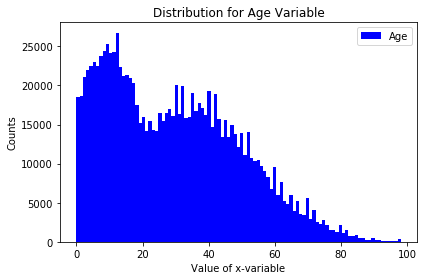

In [33]:
plot_umur = df_raw1['UMUR']

plot_umur.plot.hist(grid = False, bins=99, rwidth=1, color='blue', label='Age')
plt.title('Distribution for Age Variable')
plt.xlabel('Value of x-variable')
plt.ylabel('Counts')
plt.legend(loc="best")
plt.tight_layout()
plt.rcParams['figure.figsize'] = [10, 4]
plt.show()

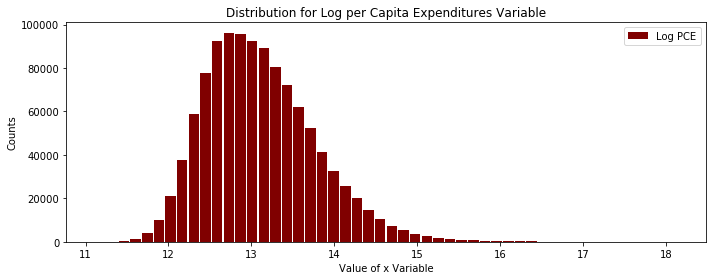

In [34]:
# Histogram for Log Expenditure per Capita Variable
df_raw1 = df_raw1.assign(log_exp_cap = np.log(df_raw1['EXP_CAP']))
plot_exp = df_raw1['log_exp_cap']

plot_exp.plot.hist(grid=False, bins=50, rwidth=0.9, color='maroon', label='Log PCE')
plt.title('Distribution for Log per Capita Expenditures Variable')
plt.xlabel('Value of x Variable')
plt.ylabel('Counts')
plt.legend(loc='best')
plt.tight_layout()
plt.rcParams['figure.figsize'] = [10, 4]
plt.show()

In [35]:
dataPendidikan = df_raw1['B5R17']

In [36]:
dataUmur = df_raw1['UMUR']

In [38]:
import seaborn as sn

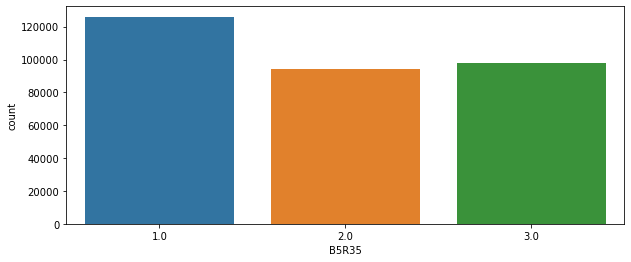

In [39]:
sn.countplot(x = 'B5R35', data = df_raw1)

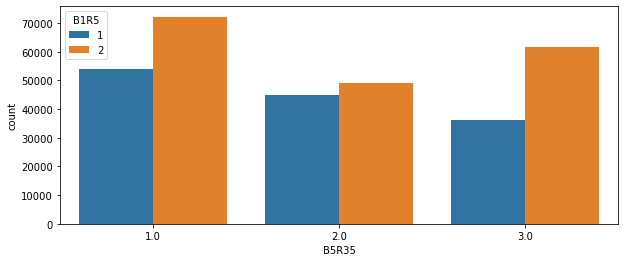

In [40]:
sn.countplot(x = 'B5R35', data = df_raw1, hue = 'B1R5')

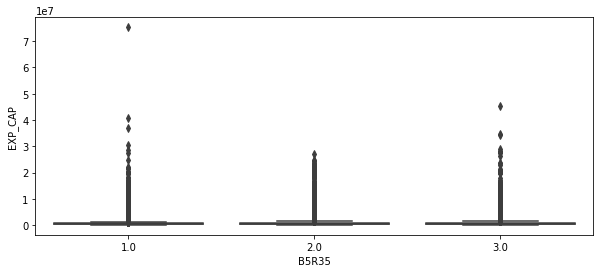

In [41]:
sn.boxplot(x = 'B5R35', y = 'EXP_CAP', data=df_raw1)

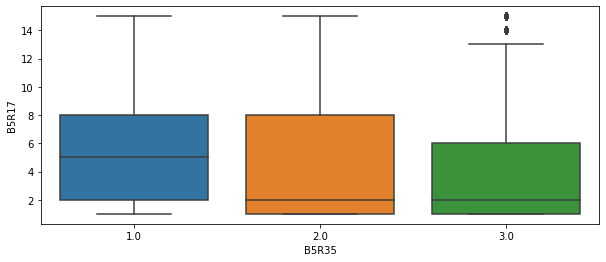

In [42]:
sn.boxplot(x = 'B5R35', y = 'B5R17', data=df_raw1)

Rada misleading sih, soalnya kan umur 50 ke atas pada menopause, jadi perlu hati-hati sih pake UMUR

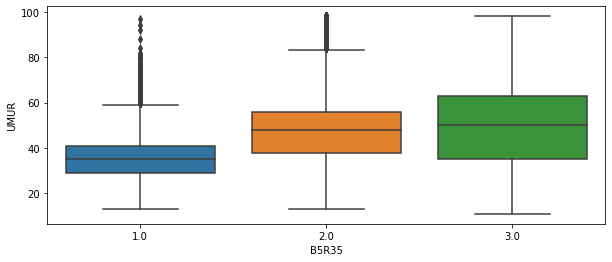

In [43]:
sn.boxplot(x = 'B5R35', y = 'UMUR', data = df_raw1)